In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("data/raw/AirQuality.csv", sep=';', low_memory=False)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [6]:
df.columns = [
    "Date", "Time", "CO_GT", "PT08_S1_CO", "NMHC_GT",
    "C6H6_GT", "PT08_S2_NMHC", "NOx_GT", "PT08_S3_NOx",
    "NO2_GT", "PT08_S4_NO2", "PT08_S5_O3", "Temp", "RH", "AH"
]

In [7]:
df.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'NOx_GT', 'PT08_S3_NOx', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'Temp', 'RH', 'AH'],
      dtype='object')

In [8]:
df.replace(-200, np.nan, inplace=True)

In [9]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'] , format='%d/%m/%Y %H.%M.%S', errors='coerce')
df = df.set_index('Datetime')
df = df.drop(columns=['Date', 'Time'])

In [10]:
df = df[~df.index.isna()]
df.rename(columns={"RH": "Humidity", "AH": "Absolute_Humidity"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO_GT              9357 non-null   object 
 1   PT08_S1_CO         8991 non-null   float64
 2   NMHC_GT            914 non-null    float64
 3   C6H6_GT            9357 non-null   object 
 4   PT08_S2_NMHC       8991 non-null   float64
 5   NOx_GT             7718 non-null   float64
 6   PT08_S3_NOx        8991 non-null   float64
 7   NO2_GT             7715 non-null   float64
 8   PT08_S4_NO2        8991 non-null   float64
 9   PT08_S5_O3         8991 non-null   float64
 10  Temp               9357 non-null   object 
 11  Humidity           9357 non-null   object 
 12  Absolute_Humidity  9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 1023.4+ KB


In [11]:
df = df.sort_index()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CO_GT              9357 non-null   object 
 1   PT08_S1_CO         8991 non-null   float64
 2   NMHC_GT            914 non-null    float64
 3   C6H6_GT            9357 non-null   object 
 4   PT08_S2_NMHC       8991 non-null   float64
 5   NOx_GT             7718 non-null   float64
 6   PT08_S3_NOx        8991 non-null   float64
 7   NO2_GT             7715 non-null   float64
 8   PT08_S4_NO2        8991 non-null   float64
 9   PT08_S5_O3         8991 non-null   float64
 10  Temp               9357 non-null   object 
 11  Humidity           9357 non-null   object 
 12  Absolute_Humidity  9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 1023.4+ KB


In [13]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
df_original = df.copy()
df_original.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOx_GT,PT08_S3_NOx,NO2_GT,PT08_S4_NO2,PT08_S5_O3,Temp,Humidity,Absolute_Humidity
count,9357.000000,8991.000000,914.000000,9357.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1099.833166,218.811816,1.865683,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,9.778305,39.485380,-6.837604
std,77.657170,217.080037,204.459921,41.380206,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,43.203623,51.216145,38.976670
min,-200.000000,647.000000,7.000000,-200.000000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,937.000000,67.000000,4.000000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,10.900000,34.100000,0.692300
50%,1.500000,1063.000000,150.000000,7.900000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.200000,48.600000,0.976800
75%,2.600000,1231.000000,297.000000,13.600000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


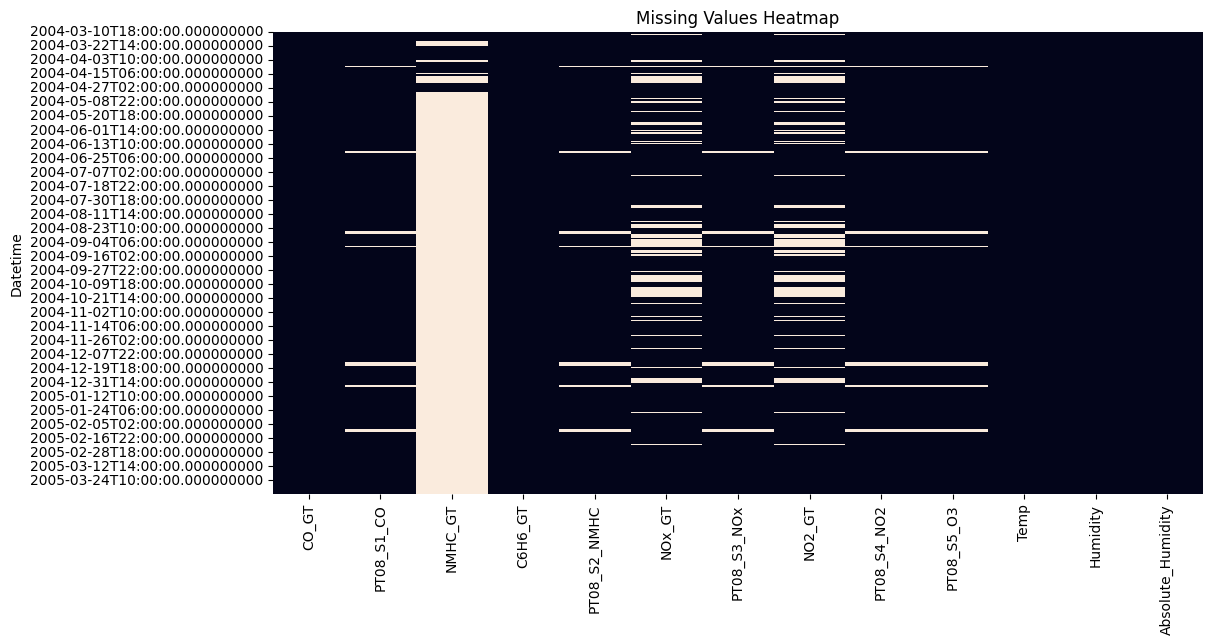

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [16]:
df.isna().mean().sort_values(ascending=False)

NMHC_GT              0.902319
NO2_GT               0.175484
NOx_GT               0.175163
PT08_S2_NMHC         0.039115
PT08_S1_CO           0.039115
PT08_S5_O3           0.039115
PT08_S4_NO2          0.039115
PT08_S3_NOx          0.039115
CO_GT                0.000000
C6H6_GT              0.000000
Temp                 0.000000
Humidity             0.000000
Absolute_Humidity    0.000000
dtype: float64

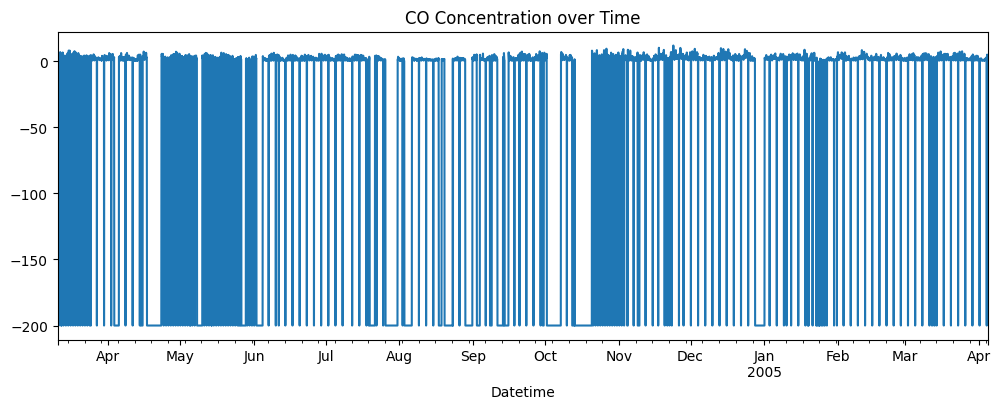

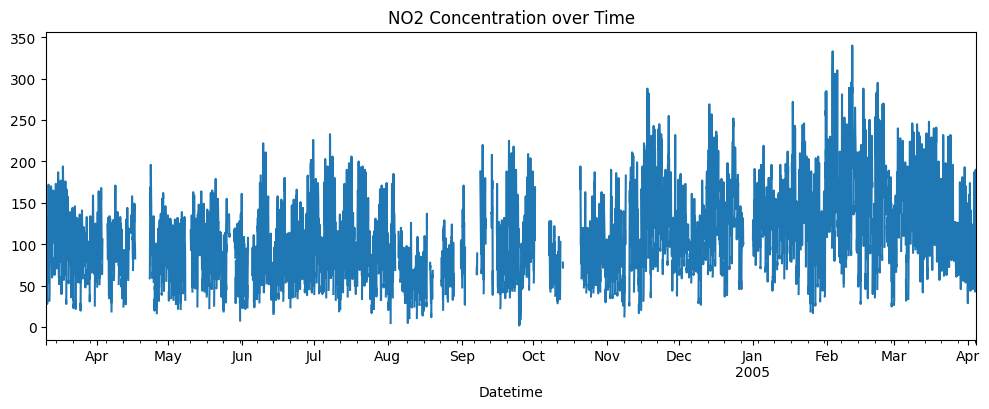

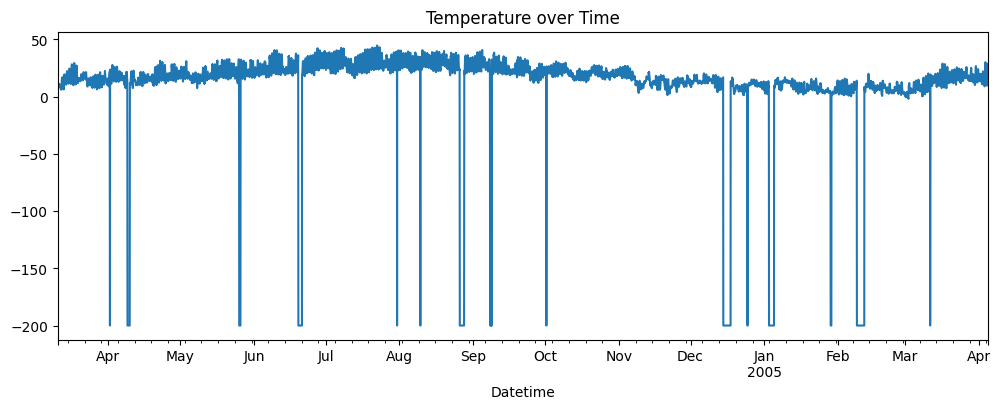

In [17]:
df['CO_GT'].plot(figsize=(12,4), title='CO Concentration over Time')
plt.show()

df['NO2_GT'].plot(figsize=(12,4), title='NO2 Concentration over Time')
plt.show()

df['Temp'].plot(figsize=(12,4), title='Temperature over Time')
plt.show()

In [18]:
result = adfuller(df['CO_GT'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -9.552224712393055
p-value: 2.553762126200137e-16


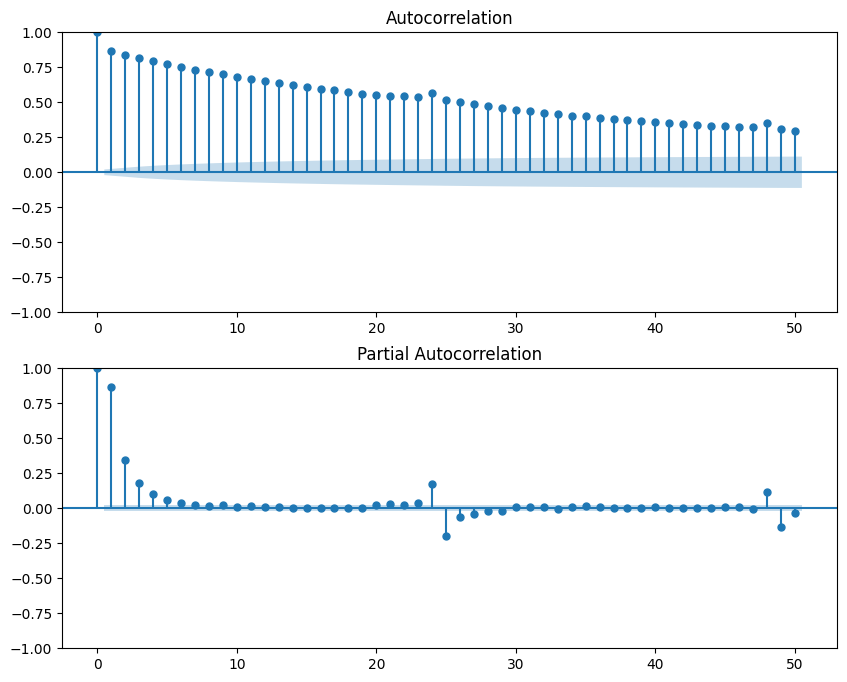

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10,8))
plot_acf(df['CO_GT'].dropna(), ax=ax[0], lags=50);
plot_pacf(df['CO_GT'].dropna(), ax=ax[1], lags=50);
plt.show()

In [20]:
df.to_parquet("data/processed/airquality_cleaned.parquet")